<a href="https://colab.research.google.com/github/ElisabethDB/Eindopdracht-Deep-Learning/blob/main/0_Scraping_De_Bock_Elisabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

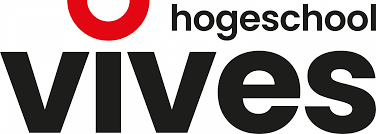<br>

**Deep Learning**<br>
Academiejaar 2022-2023<br>
De Bock Elisabeth

---

---


# Datascraping - Rembrandt

In [ ]:
#importeren van de nodige bibliotheken
from bs4 import BeautifulSoup
import requests
import urllib
import shutil
import os

In [ ]:
#ophalen van de url's van de verschillende categoriëen van de schilderijen

url = "http://www.rembrandtpainting.net/complete_catalogue/complete_catalogue.htm"
pasteUrl = "http://www.rembrandtpainting.net/complete_catalogue/"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
page = soup.find_all("tr")

cat = []
for x in page:
  for y in x.find_all("a"):
    cat.append(pasteUrl + y['href'])

cat

['http://www.rembrandtpainting.net/complete_catalogue/start_history.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_history_two.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_landscapes.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_self_portraits.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_portraits.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_family_portraits.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/start_allegories.htm']

In [ ]:
# url's ophalen per categorie

cat2 = []
for _ in cat:
  response = requests.get(_)
  soup = BeautifulSoup(response.content, 'html.parser')
  page = soup.table.find_all("tr")

  
  for x in page:
    for y in x.find_all("a"):
      cat2.append(pasteUrl + y['href'])

cat2

['http://www.rembrandtpainting.net/complete_catalogue/storia/st_stephen.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/history_painting.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/eunuch.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/tobit.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/balaam.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia_b/rich_man.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia_b/paul_prison.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/../rmbrndt_1620-35/saul.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/saul.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/samson.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia_b/two_scholars.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/simon_baby_jesus.htm',
 'http://www.rembrandtpainting.net/complete_catalogue/storia/j

In [ ]:
len(cat2)

233

We vinden 233 pagina's die we steekproef gewijs eens gaan controleren.

Daar merken we dat de grote images de div id 'workimage' meekrijgen. Daar gaan we dan op filteren.

We merken ook dat er foto's zijn die starten met ../../, dus die moeten we op een andere manier verwerken.

In [ ]:
!mkdir /content/drive/MyDrive/Rembrandt
count = 0
site = "http://www.rembrandtpainting.net/" 

for url in cat2:
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    page = soup.find('div',attrs={'id' : 'workimage'})
    imgSrc = page.find('img')['src'] 

    if "../../" in imgSrc:
      link = site + imgSrc[6:len(imgSrc)]
    else:
      link = url[0:url.rfind("/")+1] + imgSrc 
    
    print(link)
    filename = "/content/drive/MyDrive/Rembrandt/" + str(count) + ".jpg" 
    urllib.request.urlretrieve(link, filename)
    count += 1
  except:
    pass




mkdir: cannot create directory ‘/content/drive/MyDrive/Rembrandt’: File exists
http://www.rembrandtpainting.net/complete_catalogue/storia/images/st_stephen.jpg
http://www.rembrandtpainting.net/rmbrndt_1620-35/1620_35_images/history_painting.jpg
http://www.rembrandtpainting.net/complete_catalogue/storia/images/eunuch.jpg
http://www.rembrandtpainting.net/rmbrndt_1620-35/1620_35_images/blind_hermit.jpg
http://www.rembrandtpainting.net/complete_catalogue/storia/images/beating_ass.jpg
http://www.rembrandtpainting.net/complete_catalogue/storia_b/images/rich_man.jpg
http://www.rembrandtpainting.net/complete_catalogue/storia_b/images/paul_prison.jpg
http://www.rembrandtpainting.net/complete_catalogue/../rmbrndt_1620-35/1620_35_images/earlywork.jpg
http://www.rembrandtpainting.net/rmbrndt_1620-35/1620_35_images/earlywork.jpg
http://www.rembrandtpainting.net/rmbrndt_1620-35/1620_35_images/dahlia.jpg
http://www.rembrandtpainting.net/complete_catalogue/storia/images/simon_baby_jesus.jpg
http://www

In [ ]:
print(count)

208


Wij hebben 208 schilderijen kunnen downloaden.